In [27]:
import pandas as pd
df = pd.read_csv('data/development.csv').set_index('Id')
df.drop(['sampling_rate', 'path', 'num_characters'], axis=1, inplace=True)
df['tempo'] = df['tempo'].apply(lambda x: x.replace('[', '').replace(']', '')).astype('float')
df.drop('ethnicity', axis=1, inplace=True)
gender =  {'male': 1, 'female': 0, "famale": 0}
df['gender'] = df['gender'].map(gender)

In [3]:
df.head()

,age,gender,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_pauses,silence_duration
Id,,,,,,,,,,,,,,,
0,24.0,0,1821.6906,3999.7170,145.43066,0.013795,0.082725,0.002254,0.210093,3112.257251,151.999081,-123.999726,69,39,23.846893
1,22.5,0,1297.8187,3998.8590,145.37268,0.025349,0.096242,0.007819,0.078849,1688.016389,129.199219,-86.928478,69,21,19.388662
2,22.0,0,1332.8524,3998.8025,145.42395,0.019067,0.119456,0.002974,0.105365,2576.901706,117.453835,-98.450670,69,1,21.640998
3,22.0,0,1430.3499,3998.4510,147.98083,0.017004,0.102389,0.022371,0.173701,3269.751413,117.453835,-56.459762,69,9,19.644127
4,22.0,1,1688.7234,3998.6113,145.44772,0.028027,0.124831,0.005369,0.107279,1930.897375,112.347147,-80.349204,69,11,18.041905


In [28]:
y = (df['age'] < 40).astype('int')
X = df.drop(['age'], axis=1)    

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

all_y_true = []
all_y_pred = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = RandomForestClassifier(class_weight='balanced', random_state=42)
    # model = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

print(classification_report(all_y_true, all_y_pred))




              precision    recall  f1-score   support

           0       0.50      0.12      0.19       472
           1       0.85      0.98      0.91      2461

    accuracy                           0.84      2933
   macro avg       0.68      0.55      0.55      2933
weighted avg       0.80      0.84      0.79      2933



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

all_y_true = []
all_y_pred = []

X = X[['gender', 'jitter', 'shimmer', 'hnr', 'num_pauses', 'silence_duration']]

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = KNeighborsClassifier(n_neighbors=40)
    # model = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

print(classification_report(all_y_true, all_y_pred))




              precision    recall  f1-score   support

           0       0.53      0.10      0.17       472
           1       0.85      0.98      0.91      2461

    accuracy                           0.84      2933
   macro avg       0.69      0.54      0.54      2933
weighted avg       0.80      0.84      0.79      2933



In [29]:
import numpy as np
n = (y == 0).sum()
idx = np.random.choice(y[y == 1].index, n, replace=False)

X1 = pd.concat([X.loc[idx], X[y == 0]])
y1 = pd.concat([y.loc[idx], y[y == 0]])

from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

model = RandomForestClassifier(class_weight='balanced', random_state=42)    
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.84      0.74        96
           1       0.77      0.55      0.64        93

    accuracy                           0.70       189
   macro avg       0.72      0.70      0.69       189
weighted avg       0.71      0.70      0.69       189



In [30]:
y_p = model.predict(X)

print(classification_report(y, y_p))

              precision    recall  f1-score   support

           0       0.38      0.97      0.54       472
           1       0.99      0.69      0.82      2461

    accuracy                           0.74      2933
   macro avg       0.68      0.83      0.68      2933
weighted avg       0.89      0.74      0.77      2933



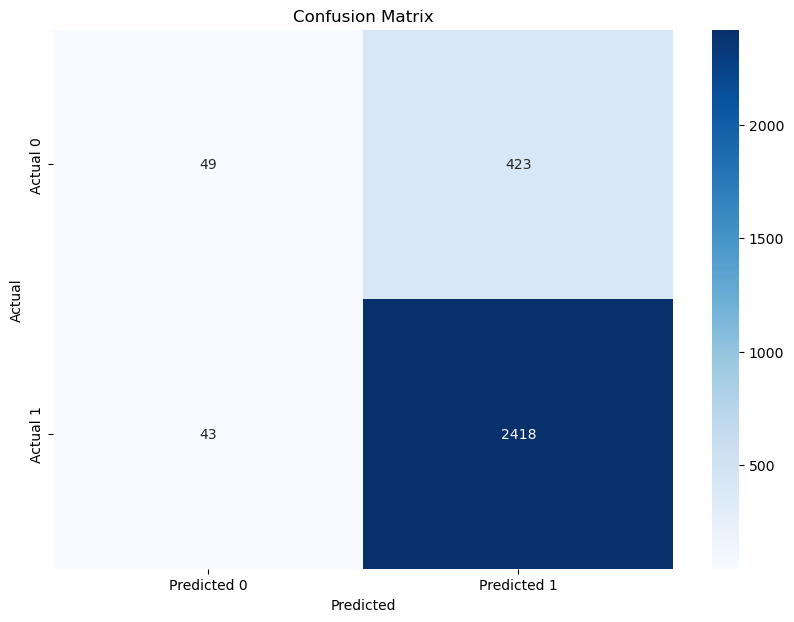

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Calcola la matrice di confusione
cm = confusion_matrix(all_y_true, all_y_pred)

# Crea una heatmap della matrice di confusione
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()